<a href="https://colab.research.google.com/github/pisceno/algoritmos/blob/master/An%C3%A1lisis_Clustering_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

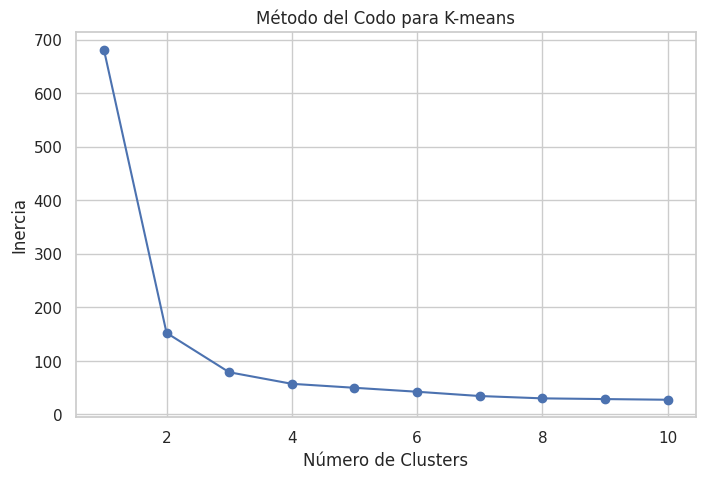

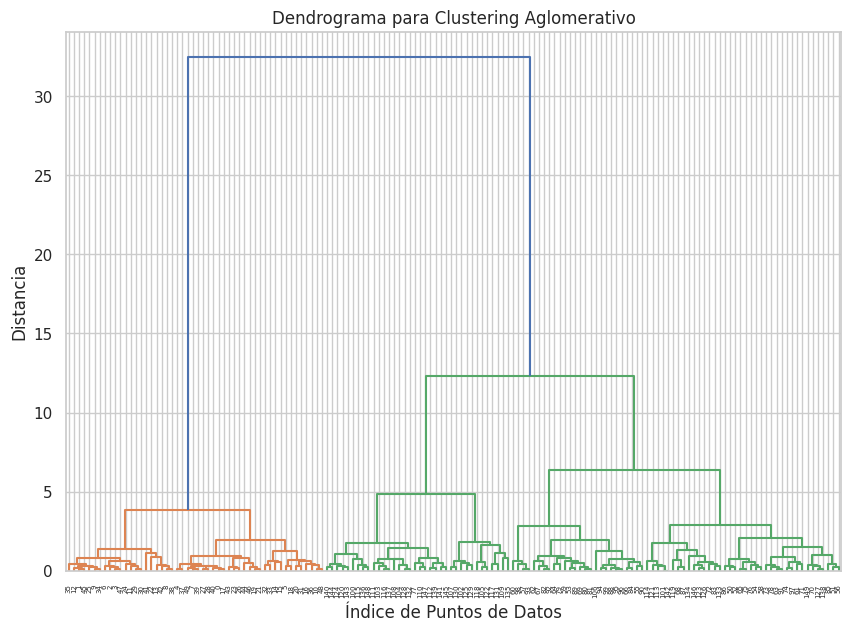

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
url_iris = 'https://raw.githubusercontent.com/pisceno/algoritmos/refs/heads/master/iris.csv'
df = pd.read_csv(url_iris)
df.head(5)
# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Cargar el dataset Iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Separar las características y las etiquetas
X = df.iloc[:, :-1]
y = df['species']

# 1. Determinación del Número de Clusters

## Técnica del Codo para K-means
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Gráfico del Codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.show()

## Dendrograma para el Clustering Aglomerativo
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrograma para Clustering Aglomerativo")
plt.xlabel("Índice de Puntos de Datos")
plt.ylabel("Distancia")
plt.show()

# Basado en el gráfico del codo y el dendrograma, se observa que el número óptimo de clusters parece ser 3.

# 2. Implementación de los Métodos de Clustering

### DBSCAN
# Documentación breve: DBSCAN identifica clusters basados en la densidad. El parámetro eps controla la distancia máxima entre dos puntos para ser vecinos, y min_samples indica el número mínimo de puntos en el vecindario para formar un cluster.

# Inicial DBSCAN sin especificar número de clusters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Ajuste de parámetros de DBSCAN si no obtenemos 3 clusters
unique_labels = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if unique_labels != 3:
    dbscan = DBSCAN(eps=0.6, min_samples=4)
    dbscan_labels = dbscan.fit_predict(X)

### K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

### Clustering Aglomerativo con 3 clusters
agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(X)

# 3. Visualización de los Clusters

def plot_clusters(x, y, labels, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X.iloc[:, x], y=X.iloc[:, y], hue=labels, palette="viridis", s=60)
    plt.xlabel(X.columns[x])
    plt.ylabel(X.columns[y])
    plt.title(title)
    plt.legend(title="Cluster")
    plt.show()

# Sepal Length vs Sepal Width
plot_clusters(0, 1, kmeans_labels, "K-means Clustering: Sepal Length vs Sepal Width")
plot_clusters(0, 1, agglo_labels, "Aglomerativo Clustering: Sepal Length vs Sepal Width")
plot_clusters(0, 1, dbscan_labels, "DBSCAN Clustering: Sepal Length vs Sepal Width")
plot_clusters(0, 1, y, "Clases Reales: Sepal Length vs Sepal Width")

# Petal Length vs Petal Width
plot_clusters(2, 3, kmeans_labels, "K-means Clustering: Petal Length vs Petal Width")
plot_clusters(2, 3, agglo_labels, "Aglomerativo Clustering: Petal Length vs Petal Width")
plot_clusters(2, 3, dbscan_labels, "DBSCAN Clustering: Petal Length vs Petal Width")
plot_clusters(2, 3, y, "Clases Reales: Petal Length vs Petal Width")

# Sepal Length vs Petal Length
plot_clusters(0, 2, kmeans_labels, "K-means Clustering: Sepal Length vs Petal Length")
plot_clusters(0, 2, agglo_labels, "Aglomerativo Clustering: Sepal Length vs Petal Length")
plot_clusters(0, 2, dbscan_labels, "DBSCAN Clustering: Sepal Length vs Petal Length")
plot_clusters(0, 2, y, "Clases Reales: Sepal Length vs Petal Length")

# 4. Evaluación de la Calidad de los Clusters

## Cálculo del Adjusted Rand Index (ARI)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
agglo_ari = adjusted_rand_score(y, agglo_labels)
dbscan_ari = adjusted_rand_score(y, dbscan_labels)

print("Adjusted Rand Index (ARI):")
print(f"K-means: {kmeans_ari}")
print(f"Clustering Aglomerativo: {agglo_ari}")
print(f"DBSCAN: {dbscan_ari}")

# Análisis: El método con el valor de ARI más cercano a 1 es el que más se aproxima a las clases originales.